In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# PLOT UTILS
def comparison_hist(a, b):
    fig, ax = plt.subplots()
    ranges = (min(a.min(), b.min()), max(a.max(), b.max()))
    a_heights, a_bins = np.histogram(a, range=ranges)
    b_heights, b_bins = np.histogram(b, range=ranges, bins=a_bins)
    width = (a_bins[1] - a_bins[0])/3
    ax.bar(a_bins[:-1], a_heights, width=width, facecolor='green')
    ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='blue')
    
def comparison_scat(df, a, b):
    fig, ax = plt.subplots()
    ax.scatter(a[0], a[1], s=10, c='green', label='a')
    ax.scatter(b[0], b[1], s=10, c='blue', label='b')

# Vorstände - Gesamtdaten

Diese beinhaltet Gesamtbezüge und Anzahl Vorstände und daraus errechnetes durchschnittl. Gehalt für 2013 und 2014 (selber gesammelte Werte). Als Relationsgrößen setzen wir die Größe der Sparkasse, die wir durch die Werte Bilanzsumme, Vergebene Kredite und Anzahl Mitarbeiter errechnen, alles Werte aus dem Crowdnewsromm)

**TODO**: Wo ist der Gehaltsunterschied bei etwa gleich großen Sparkassen am größten?

In [2]:
df = pd.read_csv('./data/jahresabschluss_kerndaten.csv')

## Von wie vielen Sparkassen haben wir diese Gehaltswerte erfasst?

In [3]:
# 2013
len(df[pd.notnull(df.gesamtbezuege_2013)].index)

288

In [4]:
# 2014
len(df[pd.notnull(df.gesamtbezuege_2014)].index)

292

## Wie entwickelten sich die Gesamtbezüge?

### 2014

In [5]:
mean_2014 = df.gesamtbezuege_2014.mean()
mean_2014

859430.86986301374

### 2013

In [6]:
mean_2013 = df.gesamtbezuege_2013.mean()
mean_2013

845776.9815625

### Veränderung 2013 - 2014

In [7]:
# absolute
mean_2014-mean_2013

13653.888300513732

In [8]:
# percent
(mean_2014-mean_2013)/mean_2013*100

1.6143603571817895

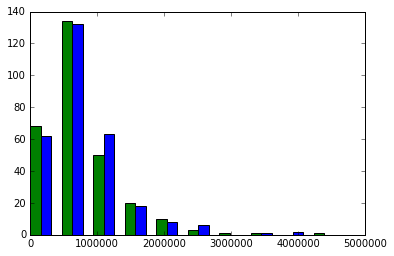

In [9]:
comparison_hist(df.gesamtbezuege_2013, df.gesamtbezuege_2014)

## Wie viel verdient ein Vorstand durchschnittlich?

In [10]:
df['durchschnittsgehalt_2014'] = df.gesamtbezuege_2014 / df.anzahl_vorstaende_2014
df['durchschnittsgehalt_2013'] = df.gesamtbezuege_2013 / df.anzahl_vorstaende_2013

### Top 10: Bei diesen Sparkassen verdienen die Vorstände durchschnittlich am meisten


In [11]:
df.sort_values('durchschnittsgehalt_2014', ascending=False)[
    ['sparkasse', 'gesamtbezuege_2014', 'durchschnittsgehalt_2014', 'anzahl_vorstaende_2014']][:10]

,sparkasse,gesamtbezuege_2014,durchschnittsgehalt_2014,anzahl_vorstaende_2014
415,Hamburger Sparkasse AG,4200000.0,840000.000000,5.0
387,Stadtsparkasse Wuppertal,1557000.0,778500.000000,2.0
413,Kreissparkasse Köln,3521400.0,704280.000000,5.0
416,Berliner Sparkasse,3911000.0,651833.333333,6.0
410,Sparkasse Hannover,2246000.0,623888.888889,3.6
412,Frankfurter Sparkasse,2452000.0,613000.000000,4.0
407,Die Sparkasse Bremen AG,2400000.0,600000.000000,4.0
398,Sparkasse Münsterland Ost,2224000.0,556000.000000,4.0
402,Sparkasse Aachen,2724000.0,544800.000000,5.0
399,Stadt- und Kreissparkasse Leipzig,1627000.0,542333.333333,3.0


## Vorstand-Durchschnittsgehalt im Verhältnis zu...

### Bemessungsgrundlage

In [12]:
df['bemessung_2014'] = df.bilanzsumme_2014 + df.eigenkapital_2014*10 + df.vergebene_kredite_2014
df['bemessung_2013'] = df.bilanzsumme_2013 + df.eigenkapital_2013*10 + df.vergebene_kredite_2013

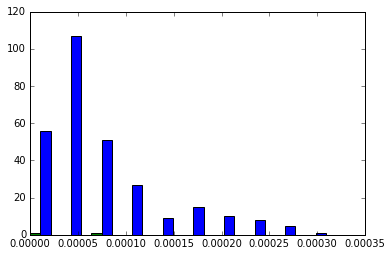

In [13]:
df['durchschnittsgehalt_2014_pro_bem'] = df.durchschnittsgehalt_2014/df.bemessung_2014
df['durchschnittsgehalt_2013_pro_bem'] = df.durchschnittsgehalt_2013/df.bemessung_2013
comparison_hist(df.durchschnittsgehalt_2013_pro_bem, df.durchschnittsgehalt_2014_pro_bem)

### Bilanzsumme

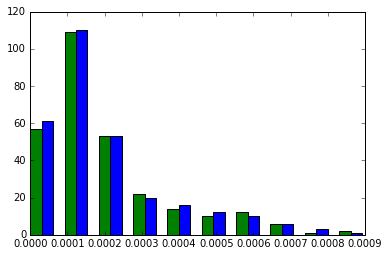

In [14]:
df['durchschnittsgehalt_2014_pro_bs'] = df.durchschnittsgehalt_2014/df.bilanzsumme_2014
df['durchschnittsgehalt_2013_pro_bs'] = df.durchschnittsgehalt_2013/df.bilanzsumme_2013
comparison_hist(df.durchschnittsgehalt_2013_pro_bs, df.durchschnittsgehalt_2014_pro_bs)

### Vergebene Kredite

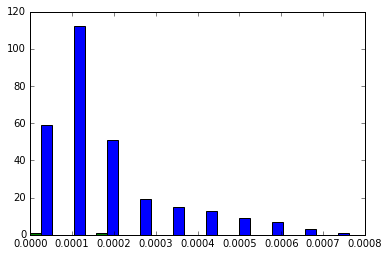

In [15]:
df['durchschnittsgehalt_2014_pro_vg'] = df.durchschnittsgehalt_2014/df.vergebene_kredite_2014
df['durchschnittsgehalt_2013_pro_vg'] = df.durchschnittsgehalt_2013/df.vergebene_kredite_2013
comparison_hist(df.durchschnittsgehalt_2013_pro_vg, df.durchschnittsgehalt_2014_pro_vg)

## Vorstands-Durchschnittsgehalt im Zusammenhang mit...

### Bemessungsgrundlage

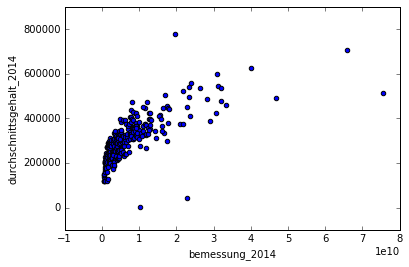

In [16]:
df.plot.scatter('bemessung_2014', 'durchschnittsgehalt_2014')

### Mitarbeiteranzahl

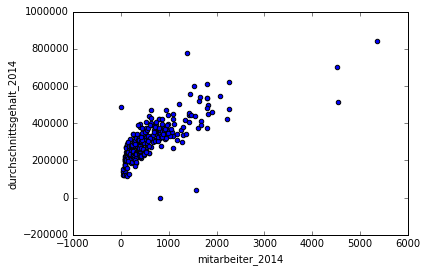

In [17]:
df.plot.scatter('mitarbeiter_2014', 'durchschnittsgehalt_2014')

### Jahresüberschuss

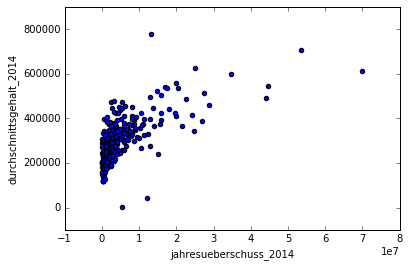

In [18]:
df[(df.jahresueberschuss_2014 > 0) & (df.durchschnittsgehalt_2014 > 0)].plot.scatter('jahresueberschuss_2014', 'durchschnittsgehalt_2014')

### Löhne & Gehälter gesamt

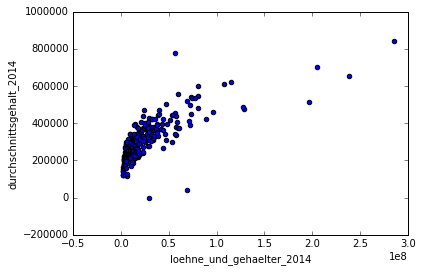

In [19]:
df.plot.scatter('loehne_und_gehaelter_2014', 'durchschnittsgehalt_2014')

### Löhne & Gehälter (Mitarbeiter) Durchschnitt

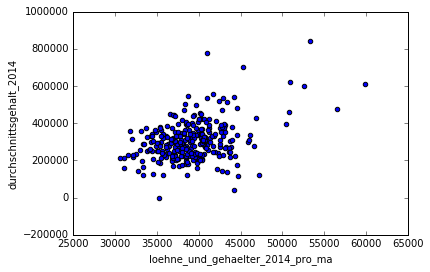

In [20]:
df['loehne_und_gehaelter_2014_pro_ma'] = df.loehne_und_gehaelter_2014/df.mitarbeiter_2014
df[df.loehne_und_gehaelter_2014_pro_ma < df.loehne_und_gehaelter_2014_pro_ma.max()].plot.scatter('loehne_und_gehaelter_2014_pro_ma', 'durchschnittsgehalt_2014')

## Bundesland-Vergleich

In [21]:
# weighted avg by 'bemessung' via groupby:
df['durchschnittsgehalt_wt_2014'] = df.durchschnittsgehalt_2014*df.bemessung_2014
df['durchschnittsgehalt_wt_2013'] = df.durchschnittsgehalt_2013*df.bemessung_2013
df_states = df.groupby('state', as_index=False).sum()
df_states['durchschnittsgehalt_2014_wt'] = df_states.durchschnittsgehalt_wt_2014/df_states.bemessung_2014
df_states['durchschnittsgehalt_2013_wt'] = df_states.durchschnittsgehalt_wt_2013/df_states.bemessung_2013
df_states[['state', 'durchschnittsgehalt_2014_wt']]

,state,durchschnittsgehalt_2014_wt
0,Baden-Württemberg,169777.624213
1,Bayern,331623.049130
2,Berlin,NaN
3,Brandenburg,238434.170231
4,Bremen,600000.000000
5,Hamburg,NaN
6,Hessen,343937.697813
7,Mecklenburg-Vorpommern,170850.474581
8,Niedersachsen,208468.230296
9,Nordrhein-Westfalen,440635.187382


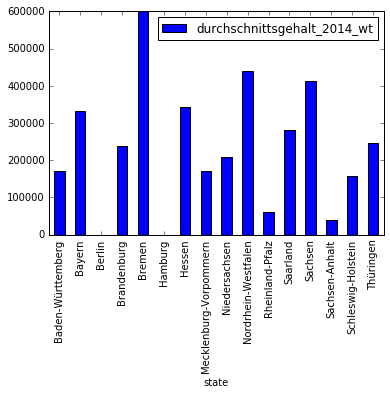

In [22]:
df_states.plot.bar('state', 'durchschnittsgehalt_2014_wt')

## Ost-West

In [23]:
# get region
df['region'] = df.verband.map(lambda x: 'ost' if x == 'OSV' else 'west')

# weighted avg by 'bemessung' via groupby:
df_region = df.groupby('region', as_index=False).sum()
df_region['durchschnittsgehalt_2014_wt'] = df_region.durchschnittsgehalt_wt_2014/df_region.bemessung_2014
df_region['durchschnittsgehalt_2013_wt'] = df_region.durchschnittsgehalt_wt_2013/df_region.bemessung_2013
df_region[['region', 'durchschnittsgehalt_2014_wt']]

,region,durchschnittsgehalt_2014_wt
0,ost,262452.918431
1,west,299065.808511


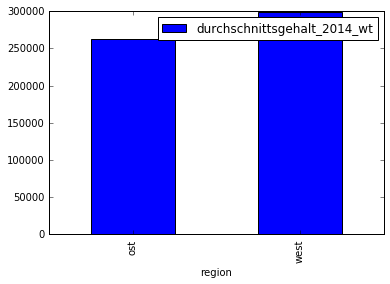

In [24]:
df_region.plot.bar('region', 'durchschnittsgehalt_2014_wt')

### absoluter Unterschied Ost-West

In [25]:
df_region['durchschnittsgehalt_2014_wt'][1] - df_region['durchschnittsgehalt_2014_wt'][0]

36612.890079751029

## Exkurs: Was verdienen die Mitarbeiter?

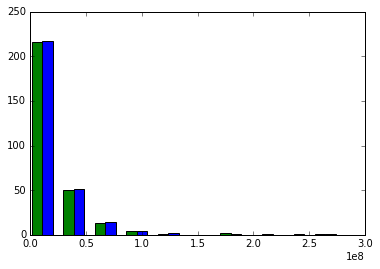

In [26]:
df['mitarbeitergehaelter_2014'] = df.loehne_und_gehaelter_2014-df.gesamtbezuege_2014
df['mitarbeitergehaelter_2013'] = df.loehne_und_gehaelter_2013-df.gesamtbezuege_2013

comparison_hist(df.mitarbeitergehaelter_2013, df.mitarbeitergehaelter_2014)

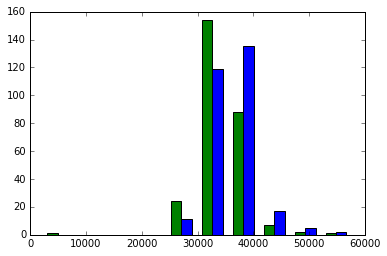

In [27]:
df['mitarbeiter_durchschnitt_2014'] = df.mitarbeitergehaelter_2014/df.mitarbeiter_2014
df['mitarbeiter_durchschnitt_2013'] = df.mitarbeitergehaelter_2013/df.mitarbeiter_2013

# fix some data errors on the edges
df = df[df.mitarbeiter_durchschnitt_2014 < df.mitarbeiter_durchschnitt_2014.max()]
df = df[df.mitarbeiter_durchschnitt_2014 > df.mitarbeiter_durchschnitt_2014.min()]

comparison_hist(df.mitarbeiter_durchschnitt_2013, df.mitarbeiter_durchschnitt_2014)

**Prozentualer Anstieg des durchschnittlichen Mitarbeitergehalts 2013 zu 2014**

In [28]:
(df.mitarbeitergehaelter_2014.mean()-df.mitarbeitergehaelter_2013.mean())/df.mitarbeitergehaelter_2013.mean()*100

2.3522213942525334